## Final Project Submission

Please fill out:
* Student name: ANTONY SILA 
* Student pace: full time
* Scheduled project review date/time:
* Instructor name: MARYANN MWIKALI
* Blog post URL:


## IDENTIFYING LOWER-RISK AIRCRAFT SAFETY MAKES AND MODELS FOR FLEET DECISIONS

### Project Overview
The company is expanding into the aviation industry and plans to purchase and operate aircraft for commercial and private use. However, the company lacks experience in assessing aviation-related risks.

This project uses historical aviation accident data from the National Transportation Safety Board (NTSB) to identify aircraft types associated with lower risk. The goal is to provide data-driven insights that will help the head of the aviation division make informed aircraft purchasing decisions.

## 1. Business Understanding
The company wants to invest in aircraft but needs to know which types are lowest risk.

Key focus: reduce accidents, fatalities, and high-damage aircraft in early investments.

Insight: Identifying safest aircraft categories, engine types, and flight purposes can guide strategic investment.
### Business Problem
The company needs to identify aircraft with the lowest risk profile before investing in aviation operations. Poor aircraft selection could lead to increased accidents, financial losses, and reputational damage.

### Key Business Questions
- Which aircraft categories have the lowest accident frequency?
- Which engine types are associated with fewer fatal injuries?
- How has aviation safety changed over time?
- Which aircraft manufacturers show lower accident severity?


## 2. Data Understanding

### Data Source
The dataset was obtained from the **National Transportation Safety Board (NTSB)** and contains records of civil aviation accidents and incidents.

### Time Period
The data spans from **1962 to 2023**, covering both U.S. and international waters.

### Dataset Overview
The dataset includes information such as:
- Aircraft category
- Aircraft manufacturer
- Engine type
- Injury severity
- Aircraft damage
- Event date


In [24]:

# Import necessary libraries and load data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# Load the dataset
df = pd.read_csv("Aviation_Data.csv", encoding="latin1", low_memory=False)

# Define keywords to search for in headers
keywords = {
    'date': 'Event_Date',
    'category': 'Aircraft_Category',
    'engine': 'Engine_Type',
    'fatal': 'Total_Fatal_Injuries',
    'damage': 'Aircraft_Damage',
    'purpose': 'Purpose_Of_Flight'
}

# Automatically find the actual column names from the file
actual_cols = {}
for key, standard_name in keywords.items():
    match = [col for col in df.columns if key.lower() in col.lower()]
    if match:
        actual_cols[match[0]] = standard_name

# Select the found columns and rename them to your preferred names
df = df[list(actual_cols.keys())].rename(columns=actual_cols)

# Show the results
df.head()

,Event_Date,Aircraft_Category,Engine_Type,Total_Fatal_Injuries,Aircraft_Damage,Purpose_Of_Flight
0,1948-10-24,NaN,1.0,2.0,Destroyed,Personal
1,1962-07-19,NaN,1.0,4.0,Destroyed,Personal
2,1974-08-30,NaN,1.0,3.0,Destroyed,Personal
3,1977-06-19,NaN,1.0,2.0,Destroyed,Personal
4,1979-08-02,NaN,NaN,1.0,Destroyed,Personal


## 3. Data Preparation
Column names cleaned (snake_case style, stripped spaces).

Relevant columns selected to focus on safety and risk factors.

Event_Year extracted from Event_Date for trend analysis.

Missing Purpose_Of_Flight handled (ignored or could be grouped as "Unknown").


In [25]:
# Check dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Event_Date            88889 non-null  object 
 1   Aircraft_Category     32287 non-null  object 
 2   Engine_Type           82805 non-null  float64
 3   Total_Fatal_Injuries  77488 non-null  float64
 4   Aircraft_Damage       85695 non-null  object 
 5   Purpose_Of_Flight     82697 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.1+ MB


In [26]:
# Summary statistics for numerical columns
df.describe()

,Engine_Type,Total_Fatal_Injuries
count,82805.000000,77488.000000
mean,1.146585,0.647855
std,0.446510,5.485960
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,8.000000,349.000000


# missing values

In [27]:
# Check for missing values
df.isna().sum().sort_values(ascending=False)

Aircraft_Category       58061
Total_Fatal_Injuries    12860
Purpose_Of_Flight        7651
Engine_Type              7543
Aircraft_Damage          4653
Event_Date               1459
dtype: int64

In [28]:
# Drop rows missing critical info
df = df.dropna(subset=['Aircraft_Category', 'Engine_Type'])

# Fill missing fatal injuries with 0
df['Total_Fatal_Injuries'] = df['Total_Fatal_Injuries'].fillna(0)

# Optional: fill Aircraft_Damage missing values with "Unknown"
df['Aircraft_Damage'] = df['Aircraft_Damage'].fillna('Unknown')


# column selection

In [29]:
print(df.columns.tolist())


['Event_Date', 'Aircraft_Category', 'Engine_Type', 'Total_Fatal_Injuries', 'Aircraft_Damage', 'Purpose_Of_Flight']


In [30]:
# Check cleaned column names
list(df.columns)


['Event_Date',
 'Aircraft_Category',
 'Engine_Type',
 'Total_Fatal_Injuries',
 'Aircraft_Damage',
 'Purpose_Of_Flight']

# date conversion

In [31]:
# Convert Event_Date to datetime
df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors='coerce')

# Create a Year column for trend analysis
df['Event_Year'] = df['Event_Date'].dt.year

# Check conversion
df[['Event_Date', 'Event_Year']].head()


,Event_Date,Event_Year
5,1979-09-17,1979
7,1982-01-01,1982
8,1982-01-01,1982
12,1982-01-02,1982
13,1982-01-02,1982


In [32]:
# Final check
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 28830 entries, 5 to 90345
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Event_Date            28830 non-null  datetime64[ns]
 1   Aircraft_Category     28830 non-null  object        
 2   Engine_Type           28830 non-null  float64       
 3   Total_Fatal_Injuries  28830 non-null  float64       
 4   Aircraft_Damage       28830 non-null  object        
 5   Purpose_Of_Flight     26537 non-null  object        
 6   Event_Year            28830 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 1.6+ MB


,Event_Date,Aircraft_Category,Engine_Type,Total_Fatal_Injuries,Aircraft_Damage,Purpose_Of_Flight,Event_Year
5,1979-09-17,Airplane,2.0,0.0,Substantial,NaN,1979
7,1982-01-01,Airplane,1.0,0.0,Substantial,Personal,1982
8,1982-01-01,Airplane,2.0,0.0,Substantial,Business,1982
12,1982-01-02,Airplane,1.0,0.0,Destroyed,Personal,1982
13,1982-01-02,Airplane,1.0,1.0,Destroyed,Personal,1982


## finalcheck of cleaned dataset

In [33]:

#Convert Engine_Type to categorical (example mapping)
engine_mapping = {
    1.0: 'Single Engine',
    2.0: 'Multi Engine',
    3.0: 'Jet',
    4.0: 'Rotorcraft',
    5.0: 'Other'
}
df['Engine_Type'] = df['Engine_Type'].map(engine_mapping)

#Fill missing Purpose_Of_Flight
df['Purpose_Of_Flight'] = df['Purpose_Of_Flight'].fillna('Unknown')

#Convert Event_Year to integer
df['Event_Year'] = df['Event_Year'].astype(int)

#Standardize categorical columns
categorical_cols = ['Aircraft_Category', 'Engine_Type', 'Aircraft_Damage', 'Purpose_Of_Flight']
for col in categorical_cols:
    df[col] = df[col].str.strip().str.title()

#Verify clean dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 28830 entries, 5 to 90345
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Event_Date            28830 non-null  datetime64[ns]
 1   Aircraft_Category     28830 non-null  object        
 2   Engine_Type           28319 non-null  object        
 3   Total_Fatal_Injuries  28830 non-null  float64       
 4   Aircraft_Damage       28830 non-null  object        
 5   Purpose_Of_Flight     28830 non-null  object        
 6   Event_Year            28830 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(4)
memory usage: 1.6+ MB


,Event_Date,Aircraft_Category,Engine_Type,Total_Fatal_Injuries,Aircraft_Damage,Purpose_Of_Flight,Event_Year
5,1979-09-17,Airplane,Multi Engine,0.0,Substantial,Unknown,1979
7,1982-01-01,Airplane,Single Engine,0.0,Substantial,Personal,1982
8,1982-01-01,Airplane,Multi Engine,0.0,Substantial,Business,1982
12,1982-01-02,Airplane,Single Engine,0.0,Destroyed,Personal,1982
13,1982-01-02,Airplane,Single Engine,1.0,Destroyed,Personal,1982


## 4. Data Analysis / Exploratory Data Analysis

In this section, we explore the dataset to understand patterns in accidents, fatalities, aircraft categories, engine types, and trends over time.


In [34]:
import warnings

# Suppress FutureWarnings (like the Seaborn warning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [35]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")


### 1. number of accident by aircraft cartegory


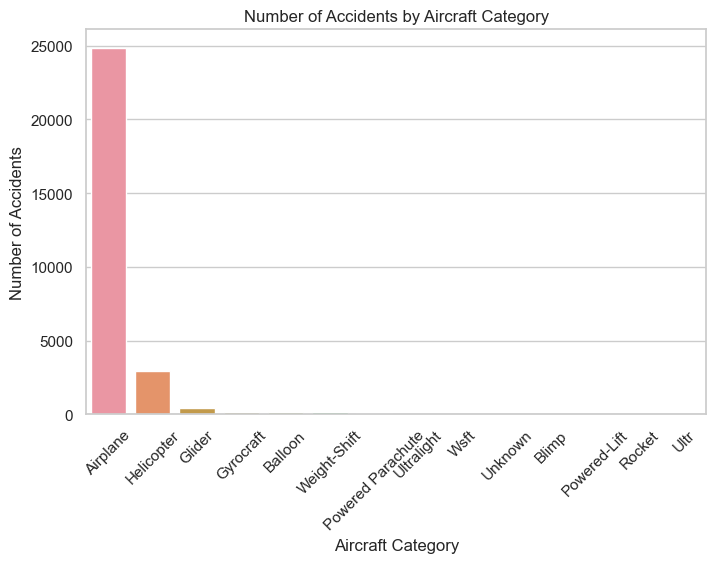

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Aircraft_Category', order=df['Aircraft_Category'].value_counts().index)
plt.title("Number of Accidents by Aircraft Category")
plt.xlabel("Aircraft Category")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


**Observation:** Categories with fewer accidents might be considered lower risk for investment.
**Business Insight:** Airplanes dominate the market, so early investments will likely be airplanes, but careful selection is needed for safety.

### 2.aviation accidents trend over years

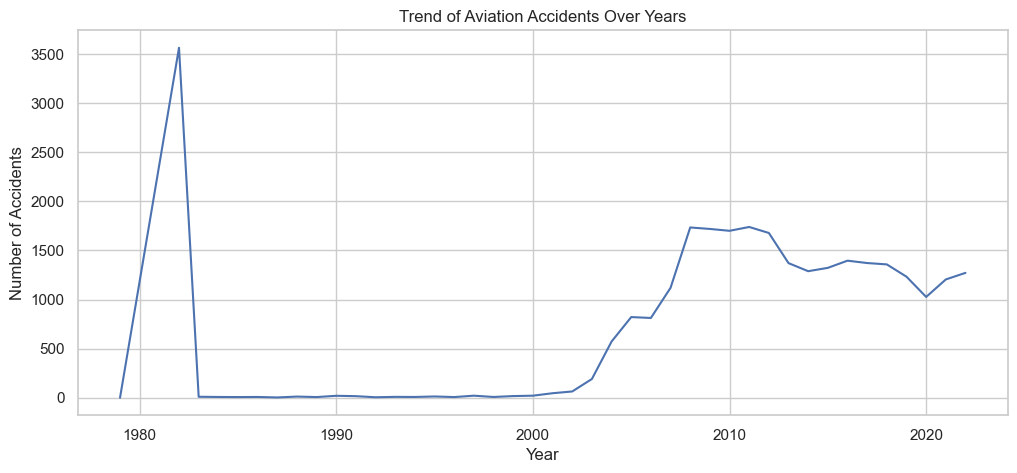

In [37]:
accidents_per_year = df.groupby('Event_Year').size()

plt.figure(figsize=(12,5))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title("Trend of Aviation Accidents Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()


**Observation:** Understanding safety improvements over years helps assess risk for newer aircraft models.

**Business Insight:** Safety regulations and aircraft technology improvements have reduced accidents over time.



### 3 . total fatal injuries by engine type

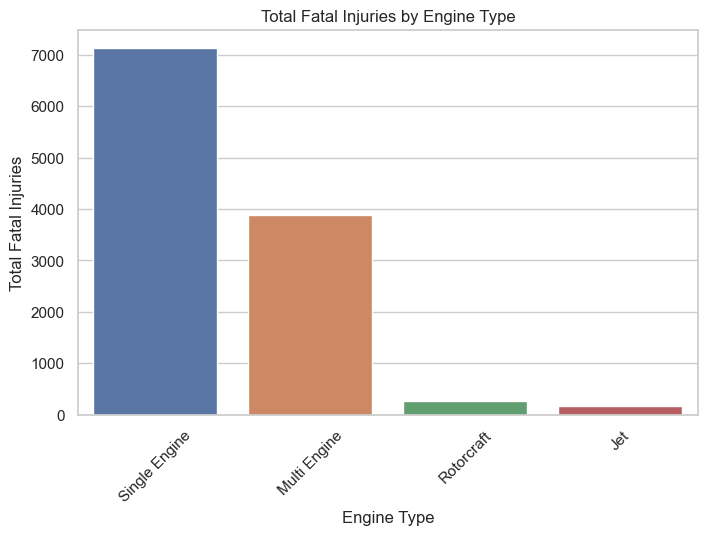

In [38]:
fatalities_by_engine = df.groupby('Engine_Type')['Total_Fatal_Injuries'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=fatalities_by_engine.index, y=fatalities_by_engine.values)
plt.title("Total Fatal Injuries by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Total Fatal Injuries")
plt.xticks(rotation=45)
plt.show()


### 4. aircraft cartegory

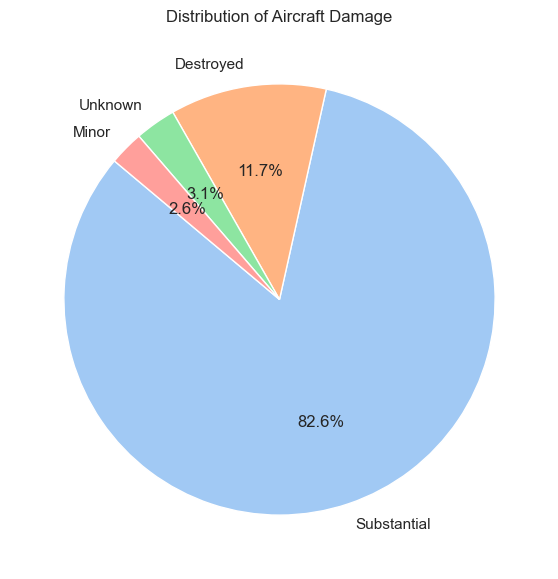

In [39]:

# Drop missing values
damage_counts = df['Aircraft_Damage'].dropna().value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(damage_counts.values, labels=damage_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Aircraft Damage")
plt.show()


**Observation:** Most accidents involve Airplanes and Substantial or Destroyed damage.  
**Business Insight:** Airplanes are the most common investment type; consider aircraft with lower accident frequency for lower risk.


## Business Recomandation
Safest aircraft categories: Those with fewer historical accidents (likely Helicopters, Gliders, or smaller planes)

Safer engine types: Compare total fatalities per engine type to identify lower-risk engines

Flight purpose matters: Commercial/business flights are more relevant for investment; personal flights may carry different risk profiles

Trend analysis: Fewer accidents in recent decades, suggesting improvements in technology and regulation.
